In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Splitting the dataset

In [7]:
df = df.drop(['age','chol','trtbps','cp','fbs','restecg','slp','caa','thall'], axis = 1)

In [8]:
df.head()

,sex,thalachh,exng,oldpeak,output
0,1,150,0,2.3,1
1,1,187,0,3.5,1
2,0,172,0,1.4,1
3,1,178,0,0.8,1
4,0,163,1,0.6,1


### Descriptive analysis

In [12]:
df.describe()

,sex,thalachh,exng,oldpeak,output
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,149.646865,0.326733,1.039604,0.544554
std,0.466011,22.905161,0.469794,1.161075,0.498835
min,0.000000,71.000000,0.000000,0.000000,0.000000
25%,0.000000,133.500000,0.000000,0.000000,0.000000
50%,1.000000,153.000000,0.000000,0.800000,1.000000
75%,1.000000,166.000000,1.000000,1.600000,1.000000
max,1.000000,202.000000,1.000000,6.200000,1.000000


In [18]:
print("The mean of maximum heart rate achieved: " + str(df['thalachh'].mean()))
print("The highest of maximum heart rate achieved: " + str(df['thalachh'].max()))
print("The lowest of maximum heart rate achieved : " + str(df['thalachh'].min()))
print("The standard deviation of maximum heart rate: " + str(df['thalachh'].std()))

The mean of maximum heart rate achieved: 149.64686468646866
The highest of maximum heart rate achieved: 202
The lowest of maximum heart rate achieved : 71
The standard deviation of maximum heart rate: 22.905161114914087


In [19]:
print("The mean of old peak is: " + str(df['oldpeak'].mean()))
print("The highest of old peak: " + str(df['oldpeak'].max()))
print("The lowest of old peak: " + str(df['oldpeak'].min()))
print("The standard deviation of old peak:" + str(df['oldpeak'].std()))

The mean of old peak is: 1.0396039603960396
The highest of old peak: 6.2
The lowest of old peak: 0.0
The standard deviation of old peak:1.1610750220686343


### Diagnostic analysis

In [23]:
df['sex'].astype(str).describe()

count     303
unique      2
top         1
freq      207
Name: sex, dtype: object

In [53]:
num_male = 303-207
num_female = 207

In [54]:
print("There are " + str(num_male) + " males and " + str(num_female) + " females in the sample" )

There are 96 males and 207 females in the sample


In [25]:
df['exng'].astype(str).describe()

count     303
unique      2
top         0
freq      204
Name: exng, dtype: object

In [27]:
print(str(303-204) + " individuals had exercise induced angina and 204 did not have exercise induced angina")

99 individuals had exercise induced angina and 204 did not have exercise induced angina


In [70]:
df[['thalachh','output']].corr()

,thalachh,output
thalachh,1.000000,0.421741
output,0.421741,1.000000


In [29]:
df[['oldpeak','output']].corr()

,oldpeak,output
oldpeak,1.000000,-0.430696
output,-0.430696,1.000000


<AxesSubplot:xlabel='output', ylabel='thalachh'>

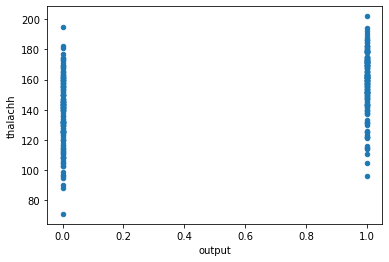

In [33]:
df.plot.scatter(x = "output", y= "thalachh")

<AxesSubplot:xlabel='output', ylabel='oldpeak'>

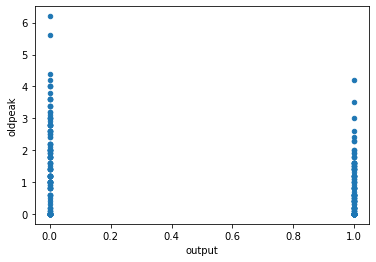

In [34]:
df.plot.scatter(x = 'output', y= 'oldpeak')

In [36]:
print("There is a moderate possitive correlation between maximum heart rate and having a heart attack(0.42)")
print("there is a moderate negative correlation between old peak and having a heart attack(-0.43)")

There is a moderate possitive correlation between maximum heart rate and having a heart attack(0.42)
there is a moderate negative correlation between old peak and having a heart attack(-0.43)


In [56]:
dfsex0 = df.loc[df['output'] == 0, 'sex']
dfsex0.astype(str).describe()

count     138
unique      2
top         1
freq      114
Name: sex, dtype: object

In [70]:
f_perc_0 = round((114 / num_female) * 100, 2)
m_perc_0 = round((24 / num_male) * 100,2)
print("In the sample " + str(f_perc_0) + " percent of female has less chance of heart attack")
print("In the sample " + str(100-f_perc_0) + " percent of female has more chance of heart attack")
print("In the sample " + str(m_perc_0) + " percent of male has less chance of heart attack")
print("In the sample " + str(100-m_perc_0) + " percent of male has more chance of heart attack")

In the sample 55.07 percent of female has less chance of heart attack
In the sample 44.93 percent of female has more chance of heart attack
In the sample 25.0 percent of male has less chance of heart attack
In the sample 75.0 percent of male has more chance of heart attack


In [73]:
df['exng'].astype(str).describe()

count     303
unique      2
top         0
freq      204
Name: exng, dtype: object

In [74]:
sum_ex0 = 204
sum_ex1 = 303-204

In [72]:
dfexng0 = df.loc[df['output'] == 0, 'exng']
dfexng0.astype(str).describe()

count     138
unique      2
top         1
freq       76
Name: exng, dtype: object

In [84]:
ex0 = round(((138-76)/sum_ex0)*100,2)
ex1 = round(((76/sum_ex1)*100),0)
print("In the sample " + str(ex0) + " percent of patients without exercise induced angina \n has less chance of heart attack")
print("In the sample " + str(100-ex0) + " percent patients without exercise induced angina\n has more chance of heart attack")
print("In the sample " + str(ex1) + " percent patients with exercise induced angina\n has less chance of heart attack")
print("In the sample " + str(100-ex1) + " percent patients with exercise induced angina\n has more chance of heart attack")

In the sample 30.39 percent of patient without exercise induced angina 
 has less chance of heart attack
In the sample 69.61 percent opatient without exercise induced angina
 has more chance of heart attack
In the sample 77.0 percent patient with exercise induced angina
 has less chance of heart attack
In the sample 23.0 percent patient with exercise induced angina
 has more chance of heart attack


In [86]:
def find_avgs(binary, continuous):
    '''This function takes the parameters of two columns of the dataframe where col1 is the column of
    binary variables(0 and 1), and col2 is the column of continuous variables. Function returns the mean
    of column2 data based on the two groups in column 1 where the first element returned corresponds to 0
    and the second element corresponds to 1
    '''
    l0 = []
    l1 = []
    for i in range(len(df)):
        if df.loc[i,binary] == 0:
            l0.append(df.loc[i,str(continuous)])
        elif df.loc[i,binary] == 1:
            l1.append(df.loc[i,str(continuous)])
    l0 = pd.Series(l0)
    l1 = pd.Series(l1)
    l0avg = l0.mean()
    l1avg = l1.mean()
    
    return l0avg, l1avg

print("The average maximum heart rate achieved for male: " + str(find_avgs("sex","thalachh")[0]))
print("The average maximum heart rate achieved for female: " + str(find_avgs("sex","thalachh")[1]))
print("The average old peak for male: " + str(find_avgs("sex","oldpeak")[0]))
print("The average old peak for female: " + str(find_avgs("sex","oldpeak")[1]))
print("The average maximum heart rate achieved for patients with exercise induced angina: " +
     str(find_avgs("exng","thalachh")[1]))
print("The average maximum heart rate achieved for patients without exercise induced angina: " +
     str(find_avgs("exng","thalachh")[0]))
print("The average old peak for  patients with exercise induced angina: " +
     str(find_avgs("exng","oldpeak")[1]))
print("The average old peak for  patients without exercise induced angina: " +
     str(find_avgs("exng","oldpeak")[0]))

The average maximum heart rate achieved for male: 151.125
The average maximum heart rate achieved for female: 148.96135265700482
The average old peak for male: 0.876041666666667
The average old peak for female: 1.1154589371980679
The average maximum heart rate achieved for patients with exercise induced angina: 137.21212121212122
The average maximum heart rate achieved for patients without exercise induced angina: 155.6813725490196
The average old peak for  patients with exercise induced angina: 1.5191919191919192
The average old peak for  patients without exercise induced angina: 0.8068627450980393


Summary

In the sample dataset, there are 303 patients including 96 males and 207 females, 99 patients who have exercise induced angina and 204 does not. We first looked at the relationship between our continuous variables: 1. maximum heart rate achieved 2. Old peak,and the output which is chance of heart attack, and discovered a moderate positive correlation between maximum heart rate achieved and the chance of heart attack, and a moderate negative correlation between old peak and the chance of having heart attack. Furthermore, we discovered that in the sample, 44.93 percent of female has more chance of heart attack while 75 percent of male has more chance of heart attack. Also, 69.61 percent of patients who does not have exercise induced angina has more chance of heart attack, while 23 percent of patients who has exercise induced angina has less chance of heart attack.

From the analysis, we see that in our sample, male patients have more chance of heart attack, and also patients who does not have exercise induced angina has more chance of heart attack as well. Given the correlation we found earlier between the two continuous variables and the output, we decided to look at the relationship between the patients' demographics and the continuous variables as well. 

We discovered that in the sample, male patients on average achieve a higher maximum heart rate, and has lower old peak, whereas female has lower maximum heart rate and higher old peak. Patients with exercise induced angina has lower maximum heart rate, and higher old peak, whereas patients that don't have exercise induced angina has higher maximum heart rate and lower old peak.

In conclusion, we find that male patients comparing to female, and patients without exercise induced angina compared to patients with exercise induced angina have a higher chance of heart attack. We identify some possible explanations which is male patients and patients without exercise induced angina achieve a relatively higher maximum heart rate and have a lower level of old peak. 